In [1]:
import emcee 
import numpy as np
import pylab as mplot
%pylab inline
from scipy.optimize import minimize
from numpy.linalg import inv

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
rho0_Y1 = np.loadtxt('rho0_Y1.txt')
rho1_Y1 = np.loadtxt('rho1_Y1.txt')
rho2_Y1 = np.loadtxt('rho2_Y1.txt')
rho3_Y1 = np.loadtxt('rho3_Y1.txt')
rho4_Y1 = np.loadtxt('rho4_Y1.txt')
rho5_Y1 = np.loadtxt('rho5_Y1.txt')

In [3]:
TauRho = np.load('Tau_Rho_SN20.npz')

rho0p_20=TauRho['rho0p']
rho0p_err_20=TauRho['rho0p_err']
rho0m_20=TauRho['rho0m']
rho0m_err_20=TauRho['rho0m_err']

rho1p_20=TauRho['rho1p']
rho1p_err_20=TauRho['rho1p_err']
rho1m_20=TauRho['rho1m']
rho1m_err_20=TauRho['rho1m_err']

rho2p_20=TauRho['rho2p']
rho2p_err_20=TauRho['rho2p_err']
rho2m_20=TauRho['rho2m']
rho2m_err_20=TauRho['rho2m_err']

rho3p_20=TauRho['rho3p']
rho3p_err_20=TauRho['rho3p_err']
rho3m_20=TauRho['rho3m']
rho3m_err_20=TauRho['rho3m_err']

rho4p_20=TauRho['rho4p']
rho4p_err_20=TauRho['rho4p_err']
rho4m_20=TauRho['rho4m']
rho4m_err_20=TauRho['rho4m_err']

rho5p_20=TauRho['rho5p']
rho5p_err_20=TauRho['rho5p_err']
rho5m_20=TauRho['rho5m']
rho5m_err_20=TauRho['rho5m_err']

tau0p_20=TauRho['tau0p']
tau0p_err_20=TauRho['tau0p_err']
tau0m_20=TauRho['tau0m']
tau0m_err_20=TauRho['tau0m_err']
tau0_cov_20=TauRho['tau0_cov'][:20,:20]

tau2p_20=TauRho['tau2p']
tau2p_err_20=TauRho['tau2p_err']
tau2m_20=TauRho['tau2m']
tau2m_err_20=TauRho['tau2m_err']
tau2_cov_20=TauRho['tau2_cov'][:20,:20]

tau5p_20=TauRho['tau5p']
tau5p_err_20=TauRho['tau5p_err']
tau5m_20=TauRho['tau5m']
tau5m_err_20=TauRho['tau5m_err']
tau5_cov_20=TauRho['tau5_cov'][:20,:20]

theta=TauRho['theta']

In [4]:
TauRho = np.load('Tau_Rho.npz')

rho0p_80=TauRho['rho0p']
rho0p_err_80=TauRho['rho0p_err']
rho0m_80=TauRho['rho0m']
rho0m_err_80=TauRho['rho0m_err']

rho1p_80=TauRho['rho1p']
rho1p_err_80=TauRho['rho1p_err']
rho1m_80=TauRho['rho1m']
rho1m_err_80=TauRho['rho1m_err']

rho2p_80=TauRho['rho2p']
rho2p_err_80=TauRho['rho2p_err']
rho2m_80=TauRho['rho2m']
rho2m_err_80=TauRho['rho2m_err']

rho3p_80=TauRho['rho3p']
rho3p_err_80=TauRho['rho3p_err']
rho3m_80=TauRho['rho3m']
rho3m_err_80=TauRho['rho3m_err']

rho4p_80=TauRho['rho4p']
rho4p_err_80=TauRho['rho4p_err']
rho4m_80=TauRho['rho4m']
rho4m_err_80=TauRho['rho4m_err']

rho5p_80=TauRho['rho5p']
rho5p_err_80=TauRho['rho5p_err']
rho5m_80=TauRho['rho5m']
rho5m_err_80=TauRho['rho5m_err']

tau0p_80=TauRho['tau0p']
tau0p_err_80=TauRho['tau0p_err']
tau0m_80=TauRho['tau0m']
tau0m_err_80=TauRho['tau0m_err']
tau0_cov_80=TauRho['tau0_cov'][:20,:20]

tau2p_80=TauRho['tau2p']
tau2p_err_80=TauRho['tau2p_err']
tau2m_80=TauRho['tau2m']
tau2m_err_80=TauRho['tau2m_err']
tau2_cov_80=TauRho['tau2_cov'][:20,:20]

tau5p_80=TauRho['tau5p']
tau5p_err_80=TauRho['tau5p_err']
tau5m_80=TauRho['tau5m']
tau5m_err_80=TauRho['tau5m_err']
tau5_cov_80=TauRho['tau5_cov'][:20,:20]


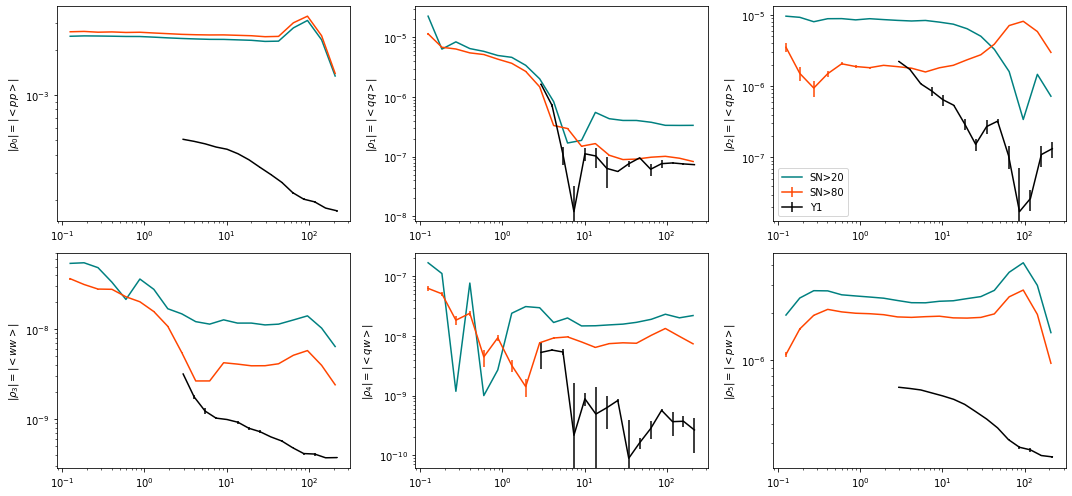

In [5]:
mplot.figure(figsize=(15,7))

mplot.subplot(2,3,1)
mplot.errorbar(theta, np.abs(rho0p_20), color='teal')
mplot.errorbar(theta, np.abs(rho0p_80), rho0p_err_80, color='orangered')
mplot.errorbar(np.exp(rho0_Y1[:,2]), np.abs(rho0_Y1[:,3]), rho0_Y1[:,6], color='k')
mplot.ylabel('$|\\rho_{0}| = |<pp>|$')
mplot.xscale('log')
mplot.yscale('log')

mplot.subplot(2,3,2)
mplot.errorbar(theta, np.abs(rho1p_20), color='teal')
mplot.errorbar(theta, np.abs(rho1p_80), rho1p_err_80, color='orangered')
mplot.errorbar(np.exp(rho1_Y1[:,2]), np.abs(rho1_Y1[:,3]), rho1_Y1[:,6], color='k')
mplot.ylabel('$|\\rho_{1}| = |<qq>|$')
mplot.xscale('log')
mplot.yscale('log')

mplot.subplot(2,3,3)
mplot.errorbar(theta, np.abs(rho2p_20), color='teal', label='SN>20')
mplot.errorbar(theta, np.abs(rho2p_80), rho2p_err_80, color='orangered', label='SN>80')
mplot.errorbar(np.exp(rho2_Y1[:,2]), np.abs(rho2_Y1[:,3]), rho2_Y1[:,6], color='k', label='Y1')
mplot.ylabel('$|\\rho_{2}| = |<qp>|$')
mplot.xscale('log')
mplot.legend()
mplot.yscale('log')

mplot.subplot(2,3,4)
mplot.errorbar(theta, np.abs(rho3p_20), color='teal')
mplot.errorbar(theta, np.abs(rho3p_80), rho3p_err_80, color='orangered')
mplot.errorbar(np.exp(rho3_Y1[:,2]), np.abs(rho3_Y1[:,3]), rho3_Y1[:,6], color='k')
mplot.ylabel('$|\\rho_{3}| = |<ww>|$')
mplot.xscale('log')
mplot.yscale('log')

mplot.subplot(2,3,5)
mplot.errorbar(theta, np.abs(rho4p_20), color='teal')
mplot.errorbar(theta, np.abs(rho4p_80), rho4p_err_80, color='orangered')
mplot.errorbar(np.exp(rho4_Y1[:,2]), np.abs(rho4_Y1[:,3]), rho4_Y1[:,6], color='k')
mplot.ylabel('$|\\rho_{4}| = |<qw>|$')
mplot.xscale('log')
mplot.yscale('log')

mplot.subplot(2,3,6)
mplot.errorbar(theta, np.abs(rho5p_20), color='teal')
mplot.errorbar(theta, np.abs(rho5p_80), rho5p_err_80, color='orangered')
mplot.errorbar(np.exp(rho5_Y1[:,2]), np.abs(rho5_Y1[:,3]), rho5_Y1[:,6], color='k')
mplot.ylabel('$|\\rho_{5}| = |<pw>|$')
mplot.xscale('log')
mplot.yscale('log')

mplot.tight_layout()

In [9]:

def log_likelihood1(p1, x1, y1, ycov1):
    A, B, C = p1
    model = A*rho0p_20 + B*rho2p_20 + C*rho5p_20
#     sigma2 = yerr1**2
#     return -0.5 * np.sum((y1 - model) ** 2 / sigma2)
    return -0.5*np.dot(np.dot((y1-model), inv(ycov1)), (y1-model))

def log_likelihood2(p2, x2, y2, ycov2):
    A, B, C = p2
    model = A*rho2p_20 + B*rho1p_20 + C*rho4p_20
#     sigma2 = yerr2**2
#     return -0.5 * np.sum((y2 - model) ** 2 / sigma2)
    return -0.5*np.dot(np.dot((y2-model), inv(ycov2)), (y2-model))

def log_likelihood3(p3, x3, y3, ycov3):
    A, B, C = p3
    model = A*rho5p_20 + B*rho4p_20 + C*rho3p_20
#     sigma2 = yerr3**2
#     return -0.5 * np.sum((y3 - model) ** 2 / sigma2)
    return -0.5*np.dot(np.dot((y3-model), inv(ycov3)), (y3-model))


def log_likelihood(p, x1, x2, x3, y1, y2, y3, ycov1, ycov2, ycov3):
    return log_likelihood1(p, x1, y1, ycov1) + log_likelihood2(p, x2, y2, ycov2) + log_likelihood3(p, x3, y3, ycov3)  

In [13]:
nll = lambda *args: -log_likelihood(*args)
initial = np.array([0.0, 1.0, 1.0])
soln = minimize(nll, initial, args=(theta, theta, theta, tau0p_20, tau2p_20, tau5p_20, tau0_cov_20, tau2_cov_20, tau5_cov_20))
alpha_ml, beta_ml, eta_ml = soln.x
print(alpha_ml, beta_ml, eta_ml)
print(soln)

0.0037642814978824037 -0.370546589637072 -3.3288072532408868
      fun: 36.959578811682334
 hess_inv: array([[1.12989908e-05, 6.88692854e-05, 5.08594521e-03],
       [6.88692854e-05, 1.01345955e-02, 3.01584221e-02],
       [5.08594521e-03, 3.01584221e-02, 3.73007713e+00]])
      jac: array([0.00000000e+00, 1.90734863e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 0.00376428, -0.37054659, -3.32880725])


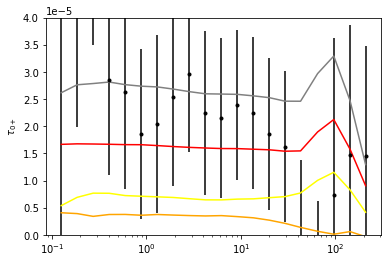

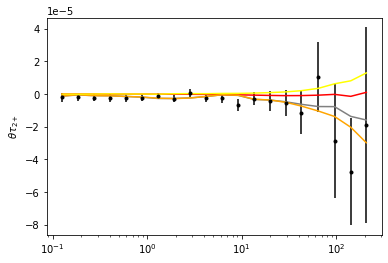

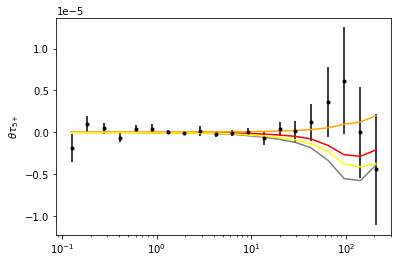

In [13]:
mplot.figure()
mplot.errorbar(theta, tau0p, np.diag(tau0_cov)**0.5, fmt=".k", capsize=0)
mplot.xscale('log')
mplot.ylabel('$\\tau_{0+}$')
mplot.plot(theta, alpha_ml*rho0p+beta_ml*rho2p+eta_ml*rho5p, color='grey')
mplot.plot(theta, alpha_ml*rho0p, color='r')
mplot.plot(theta, beta_ml*rho2p, color='orange')
mplot.plot(theta, eta_ml*rho5p, color='yellow')
mplot.ylim(0,0.00004)

mplot.figure()
mplot.errorbar(theta, theta*tau2p, theta*np.diag(tau2_cov)**0.5, fmt=".k", capsize=0)
mplot.xscale('log')
mplot.ylabel('$\\theta \\tau_{2+}$')
mplot.plot(theta, theta*(alpha_ml*rho2p+beta_ml*rho1p+eta_ml*rho4p), color='grey')
mplot.plot(theta, theta*(alpha_ml*rho2p), color='r')
mplot.plot(theta, theta*(beta_ml*rho1p), color='orange')
mplot.plot(theta, theta*(eta_ml*rho4p), color='yellow')

mplot.figure()
mplot.errorbar(theta, theta*tau5p, theta*np.diag(tau5_cov)**0.5, fmt=".k", capsize=0)
mplot.xscale('log')
mplot.ylabel('$\\theta \\tau_{5+}$')
mplot.plot(theta, theta*(alpha_ml*rho5p+beta_ml*rho4p+eta_ml*rho3p), color='grey')
mplot.plot(theta, theta*(alpha_ml*rho5p), color='r')
mplot.plot(theta, theta*(beta_ml*rho4p), color='orange')
mplot.plot(theta, theta*(eta_ml*rho3p), color='yellow')


In [37]:
pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_likelihood, args=(theta, theta, theta, tau0p, tau2p, tau5p, tau0_cov, tau2_cov, tau5_cov))
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:46<00:00, 107.36it/s]


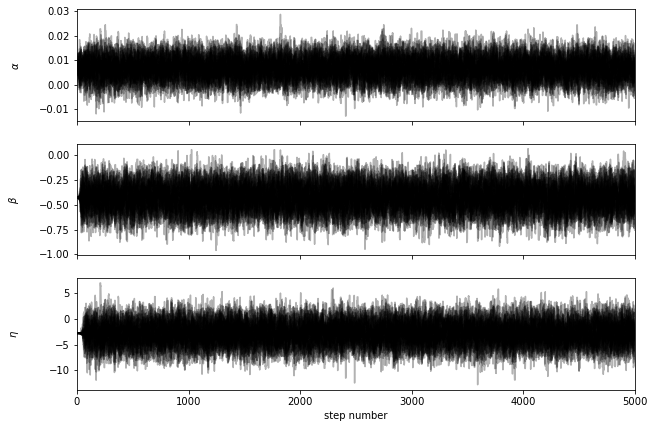

In [38]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$\\alpha$", "$\\beta$", "$\\eta$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [39]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


In [40]:
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    print(str(mcmc[1])[:7], q)

0.00681 [0.00444085 0.00431801]
-0.4218 [0.13105628 0.12699844]
-2.7680 [2.17677765 2.14993599]


In [41]:
print(-2*(log_likelihood1([0.00688, 0.23941, -2.5896],theta, tau0p, tau0_cov)+log_likelihood2([0.00688, 0.23941, -2.5896],theta, tau2p, tau2_cov)+log_likelihood3([0.00688, 0.23941, -2.5896],theta, tau5p, tau5_cov)))


      
      

86.51391853015845


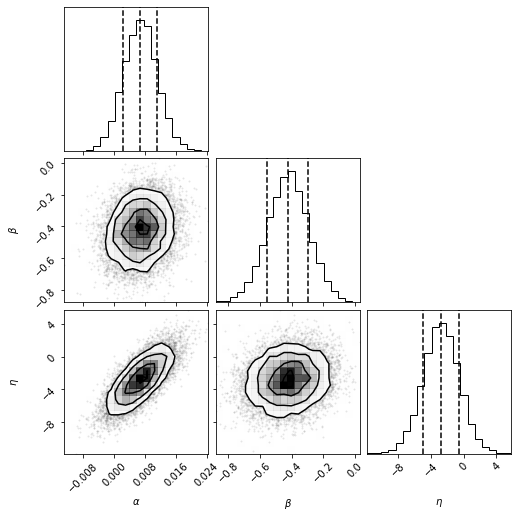

In [42]:
import corner

fig = corner.corner(flat_samples, labels=['$\\alpha$', '$\\beta$', '$\\eta$'], quantiles=[0.16, 0.5, 0.84])

In [22]:
help(corner.corner)

Help on function corner in module corner.corner:

corner(data, bins=20, *, range=None, weights=None, color='k', hist_bin_factor=1, smooth=None, smooth1d=None, labels=None, label_kwargs=None, titles=None, show_titles=False, title_fmt='.2f', title_kwargs=None, truths=None, truth_color='#4682b4', scale_hist=False, quantiles=None, verbose=False, fig=None, max_n_ticks=5, top_ticks=False, use_math_text=False, reverse=False, labelpad=0.0, hist_kwargs=None, group='posterior', var_names=None, filter_vars=None, coords=None, divergences=False, divergences_kwargs=None, labeller=None, **hist2d_kwargs)
    Make a *sick* corner plot showing the projections of a data set in a
    multi-dimensional space. kwargs are passed to hist2d() or used for
    `matplotlib` styling.
    
    Parameters
    ----------
    data : obj
        Any object that can be converted to an ``arviz.InferenceData`` object.
        Refer to documentation of ``arviz.convert_to_dataset`` for details.
    
    bins : int or array_